In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
# Read Data
dataset = pd.read_csv("train.csv")

### Data Understanding

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset.shape

(891, 12)

In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
dataset['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [8]:
dataset['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

The age range is too large, and may need to be divided into smaller groups for easy analysis.

In [9]:
dataset['Pclass'].unique()

array([3, 1, 2], dtype=int64)

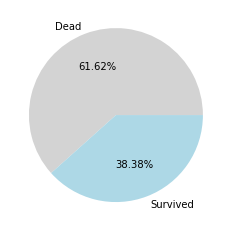

In [10]:
plt.pie(dataset['Survived'].value_counts(), labels = ['Dead','Survived'], colors = ['lightgrey','lightblue'], autopct='%.2f%%')
plt.show()

In [11]:
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are significantly higher null values in Cabin. 

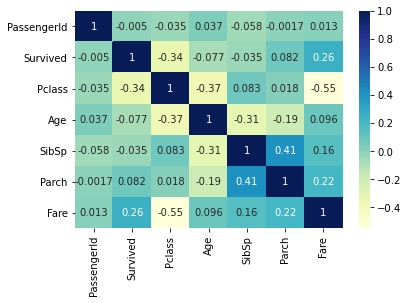

In [13]:
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

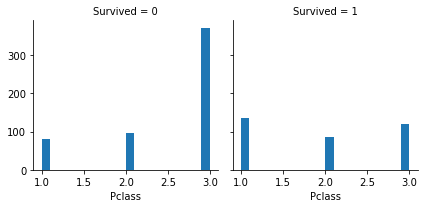

In [14]:
g = sns.FacetGrid(dataset, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

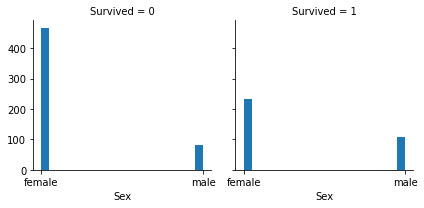

In [15]:
g = sns.FacetGrid(dataset, col='Survived')
g.map(plt.hist, 'Sex', bins=20)

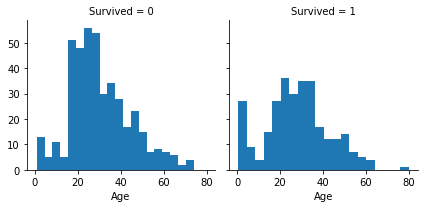

In [16]:
g = sns.FacetGrid(dataset, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Data Preparation

In [17]:
#Fill the missing values for continuous variables with mean
dataset['Age']=dataset['Age'].fillna(dataset['Age'].mean())

In [18]:
#fill missing value for Cabin & Embarked column with 'Unknown'
dataset['Cabin'].fillna('Cabin_Unknown',inplace=True)
dataset['Embarked'].fillna('Embarked_Unknown',inplace=True)

In [19]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
#Replace Survived column from boolean data to categorical data
replace = {0: "Dead", 1: "Survived"}
dataset.replace({'Survived' : replace}, inplace=True)

In [21]:
#dropping unnecessary column
dataset.drop(['Name', 'Ticket','Fare','SibSp','Parch'], axis = 1, inplace = True)
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,Cabin,Embarked
0,1,Dead,3,male,22.0,Cabin_Unknown,S
1,2,Survived,1,female,38.0,C85,C
2,3,Survived,3,female,26.0,Cabin_Unknown,S
3,4,Survived,1,female,35.0,C123,S
4,5,Dead,3,male,35.0,Cabin_Unknown,S


#### Binning Age Column

In [22]:
def binning(col, cut_points, labels=None):
  minval = col.min()
  maxval = col.max()
  break_points = [minval] + cut_points + [maxval]
  if not labels:
    labels = range(len(cut_points)+1)
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

cut_points = [1, 20, 50 ]
labels = ["Age Unknown", "Young", "Adult", "Old"]
dataset['Age'] = binning(dataset['Age'], cut_points, labels)
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,Cabin,Embarked
0,1,Dead,3,male,Adult,Cabin_Unknown,S
1,2,Survived,1,female,Adult,C85,C
2,3,Survived,3,female,Adult,Cabin_Unknown,S
3,4,Survived,1,female,Adult,C123,S
4,5,Dead,3,male,Adult,Cabin_Unknown,S


In [23]:
features=["Pclass","Survived","Sex","Age","Embarked"]
c_features = dataset[features]

### Create Passenger-Survival Rate Matrix

In [24]:
from mlxtend.preprocessing import TransactionEncoder
dataset = []
for i in range(0, c_features.shape[0]-1):
    dataset.append([str(c_features.values[i,j]) for j in range(0, c_features.shape[1])])
# dataset = in_titanic.to_xarray()

psrm = TransactionEncoder()
psrm_ary = psrm.fit(dataset).transform(dataset)
df = pd.DataFrame(psrm_ary, columns=psrm.columns_)
df.head()

,1,2,3,Adult,Age Unknown,C,Dead,Embarked_Unknown,Old,Q,S,Survived,Young,female,male
0,False,False,True,True,False,False,True,False,False,False,True,False,False,False,True
1,True,False,False,True,False,True,False,False,False,False,False,True,False,True,False
2,False,False,True,True,False,False,False,False,False,False,True,True,False,True,False
3,True,False,False,True,False,False,False,False,False,False,True,True,False,True,False
4,False,False,True,True,False,False,True,False,False,False,True,False,False,False,True


In [25]:
psrm.columns_

['1',
 '2',
 '3',
 'Adult',
 'Age Unknown',
 'C',
 'Dead',
 'Embarked_Unknown',
 'Old',
 'Q',
 'S',
 'Survived',
 'Young',
 'female',
 'male']

In [26]:
df = df.applymap(lambda x: 1 if x>0 else 0)

df.head()

,1,2,3,Adult,Age Unknown,C,Dead,Embarked_Unknown,Old,Q,S,Survived,Young,female,male
0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0
2,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0
3,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0
4,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1


In [27]:
print('Shape of dataset: ',df.shape)

Shape of dataset:  (890, 15)


In [28]:
output = apriori(df, min_support=0.2, use_colnames=psrm.columns_)
output.head()

,support,itemsets
0,0.242697,(1)
1,0.206742,(2)
2,0.550562,(3)
3,0.726966,(Adult)
4,0.615730,(Dead)


In [29]:
f_itemsets = apriori(df, min_support=0.06, use_colnames=True)

f_itemsets.shape

(140, 2)

In [30]:
f_itemsets.head()

,support,itemsets
0,0.242697,(1)
1,0.206742,(2)
2,0.550562,(3)
3,0.726966,(Adult)
4,0.188764,(C)


In [31]:
ar = association_rules(f_itemsets, metric="lift", min_threshold=1.5)  # setting the threshold of Lift Value as 1.5
ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(C),(1),0.188764,0.242697,0.095506,0.505952,2.084711,0.049693,1.532855
1,(1),(C),0.242697,0.188764,0.095506,0.393519,2.084711,0.049693,1.337610
2,(Survived),(1),0.384270,0.242697,0.152809,0.397661,1.638510,0.059548,1.257271
3,(1),(Survived),0.242697,0.384270,0.152809,0.629630,1.638510,0.059548,1.662472
4,(3),(Q),0.550562,0.085393,0.079775,0.144898,1.696831,0.032761,1.069588
...,...,...,...,...,...,...,...,...,...
123,"(S, Dead)","(2, Adult, male)",0.479775,0.086517,0.070787,0.147541,1.705344,0.029278,1.071586
124,"(male, S)","(2, Adult, Dead)",0.495506,0.085393,0.070787,0.142857,1.672932,0.028474,1.067041
125,"(2, Dead)","(male, Adult, S)",0.108989,0.359551,0.070787,0.649485,1.806379,0.031600,1.827165
126,"(2, male)","(Adult, S, Dead)",0.121348,0.351685,0.070787,0.583333,1.658679,0.028110,1.555955


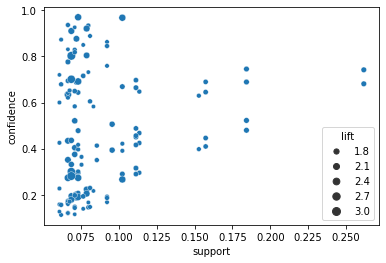

In [32]:
sns.scatterplot(x = "support", y = "confidence", size = "lift", data = ar)
plt.show()

In [33]:
ar[ (ar['lift'] >= 3) & (ar['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
85,"(2, female)","(S, Survived)",0.085393,0.24382,0.068539,0.802632,3.291899,0.047719,3.831311
86,"(2, Survived)","(female, S)",0.097753,0.22809,0.068539,0.701149,3.074005,0.046243,2.582930


Interpretation of index 85:
* The incidence rate (support) of situation (female, P_Class2) and (Survived, S) together is 0.068539.
* The percentage of happening (female, P_Class2) and (Survived, S) is 80.26%.
* The incidence rate of happening (Survived, S) situation is increased by 3.29 times when (female, P_Class2) is happended.